In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from gensim.models import HdpModel
from gensim import corpora
sns.set_theme(style="whitegrid")

In [11]:
def topic_prob_extractor(gensim_hdp):
    shown_topics = gensim_hdp.show_topics(num_topics=gensim_hdp.m_T, formatted=False)
    topics_nos = [x[0] for x in shown_topics ]
    # weights = [ sum([item[1] for item in shown_topics[topicN][1]]) for topicN in topics_nos ]
    alpha = gensim_hdp.hdp_to_lda()[0];
    return pd.DataFrame({'topic_id' : topics_nos, 'alpha' : alpha})

In [3]:
file = pd.read_table('~/cns/steps/discFeatures_10.txt', dtype=str)
df = file.drop(['Sample', 'Chr'], axis = 1)
listedDf = df.values.tolist()

In [4]:
dirichlet_dict = corpora.Dictionary(listedDf)
bow_corpus = [dirichlet_dict.doc2bow(text) for text in listedDf]

In [5]:
hdp_model = HdpModel(corpus=bow_corpus, id2word=dirichlet_dict)

In [13]:
topic_prob = topic_prob_extractor(hdp_model)

[(1.0, 25.0)]

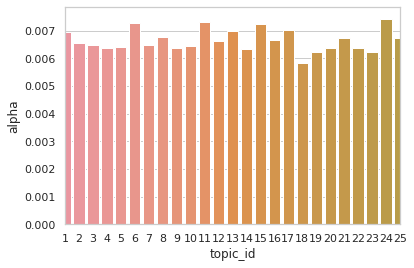

In [15]:
g = sns.barplot(x="topic_id", y="alpha" , data=topic_prob)
g.set(xlim=(1, 25))

In [8]:
topic_info = hdp_model.print_topics(num_topics=15, num_words=10)
topic_info

[(0, '0.329*1 + 0.201*4 + 0.198*5 + 0.116*6 + 0.064*3 + 0.051*2 + 0.040*0'),
 (1, '0.272*3 + 0.171*4 + 0.160*5 + 0.157*1 + 0.125*2 + 0.057*0 + 0.057*6'),
 (2, '0.280*2 + 0.224*5 + 0.148*6 + 0.135*3 + 0.103*4 + 0.059*1 + 0.051*0'),
 (3, '0.314*5 + 0.161*4 + 0.137*3 + 0.131*1 + 0.104*6 + 0.085*0 + 0.067*2'),
 (4, '0.298*4 + 0.158*5 + 0.149*2 + 0.146*3 + 0.138*0 + 0.069*1 + 0.042*6'),
 (5, '0.282*6 + 0.191*2 + 0.140*5 + 0.131*4 + 0.109*1 + 0.086*0 + 0.060*3'),
 (6, '0.236*2 + 0.206*5 + 0.139*1 + 0.124*4 + 0.117*3 + 0.115*6 + 0.063*0'),
 (7, '0.358*1 + 0.194*4 + 0.116*2 + 0.115*5 + 0.085*3 + 0.077*6 + 0.055*0'),
 (8, '0.294*4 + 0.146*3 + 0.137*1 + 0.124*6 + 0.106*2 + 0.105*0 + 0.088*5'),
 (9, '0.368*2 + 0.172*4 + 0.126*3 + 0.111*0 + 0.084*1 + 0.071*5 + 0.069*6'),
 (10, '0.270*6 + 0.202*1 + 0.180*5 + 0.122*2 + 0.101*4 + 0.080*3 + 0.044*0'),
 (11, '0.215*3 + 0.197*2 + 0.150*4 + 0.141*1 + 0.131*5 + 0.094*0 + 0.072*6'),
 (12, '0.228*6 + 0.215*4 + 0.136*3 + 0.129*0 + 0.111*2 + 0.091*1 + 0.090*5

In [9]:
hdp_model.show_topic(4, topn=20, log=False, formatted=False, num_words=None)

[('4', 0.2983106972165041),
 ('5', 0.15812960272397608),
 ('2', 0.14922613158370757),
 ('3', 0.14585631785576994),
 ('0', 0.13781966155982323),
 ('1', 0.06896446735134851),
 ('6', 0.0416931217088705)]